# LEAD SCORING ASSIGNMENT

## IMPORTING LIBRARIES

In [1]:
#Importing required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Library for test-train split
from sklearn.model_selection import train_test_split
print('Process Complete')

Process Complete


## READING THE DATA

In [2]:
df = pd.read_csv('Leads.csv')
df.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


## INSPECTING THE DATAFRAME

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## CLEANING THE DATA

#### CHECKING FOR THE UNIQUE VALUES

In [6]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### DROPPING THE UNIQUE VALUED COLUMNS

In [7]:
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [8]:
df1.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened


In [9]:
df1.shape

(9240, 32)

### CHECKING FOR THE 'NULL' PERCENTAGE

In [10]:
null_per = round(((df1.isnull().sum()/len(df1))*100),2)
null_per

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

#### DROPPING THE COLUMNS FOR WHICH THE 'NULL' VALUES > 35%. ALSO, REMOVING THE COLUMNS WHICH ARE NOT REQUIRED FOR ANALYSIS

In [11]:
df2 = df1.drop(['Lead Profile','Tags','Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened


In [12]:
df2.shape

(9240, 22)

### RE-CHECKING THE 'NULL' PERCENTAGE

In [13]:
null_per1 = round((df2.isnull().sum()/len(df2)*100),2)
null_per1

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### IMPUTING THE COLUMNS HAVING 'NULL' PERCENTAGE > 15% AS 'NOT PROVIDED'

In [14]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')

### RE-CHECKING THE 'NULL' PERCENTAGE

In [15]:
null_per2 = round((df2.isnull().sum()/len(df2)*100),2)
null_per2

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

### REMOVING THE SMALLER MISSING VALUES

In [16]:
df3 = df2[df2.isnull().sum(axis=1) <1]
df3.head(2)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened


In [17]:
df3.shape

(9074, 22)

### RE-CHECKING THE 'NULL' PERCENTAGE

In [18]:
null_per3 = round((df3.isnull().sum()/len(df3)*100),2)
null_per3

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### CATEGORISING 'COUNTRY' COLUMN FOR ANALYTICAL PURPOSE

In [19]:
df3.Country.value_counts()

India                   6491
not provided            2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
Nigeria                    4
South Africa               4
Germany                    4
Sweden                     3
Italy                      2
Uganda                     2
China                      2
Asia/Pacific Region        2
Ghana                      2
Philippines                2
Bangladesh                 2
Netherlands                2
Belgium                    2
Liberia                    1
Kenya                      1
Tanzania                   1
Indonesia                  1
Malaysia                   1
Denmark       

#### LET US CATEGORIZE THE VALUES OTHER THAN 'INDIA' AND 'NOT PROVIDED' AS 'OUTSIDE INDIA'

In [20]:
def slots(x):
    category = ""
    if x == "India":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df3['Country'] = df3.apply(lambda x:slots(x['Country']), axis = 1)
df3['Country'].value_counts()

india            6491
not provided     2296
outside india     287
Name: Country, dtype: int64

In [21]:
# Removing Id values since they are unique for everyone
df3 = df3.drop('Prospect ID',1)
df3.shape

(9074, 21)

# 

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

### CATEGORICAL VARIABLES

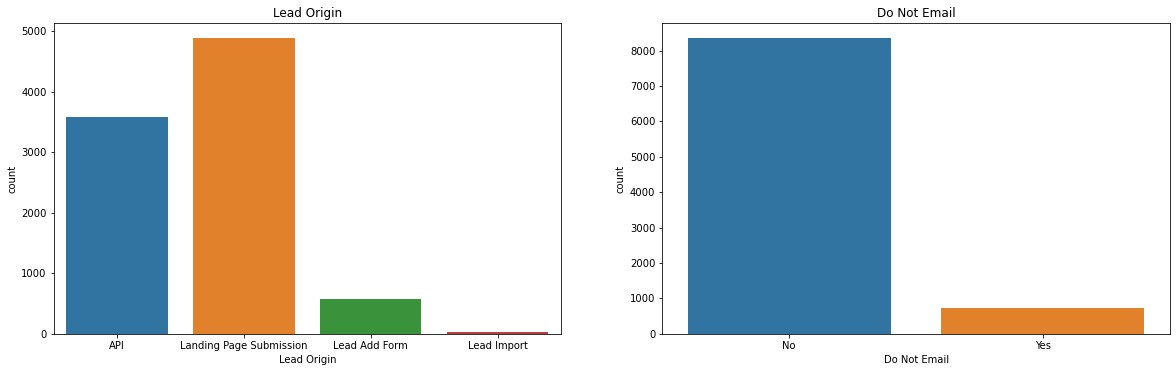

In [22]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df3['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df3['Do Not Email'])
plt.title('Do Not Email')

plt.show()

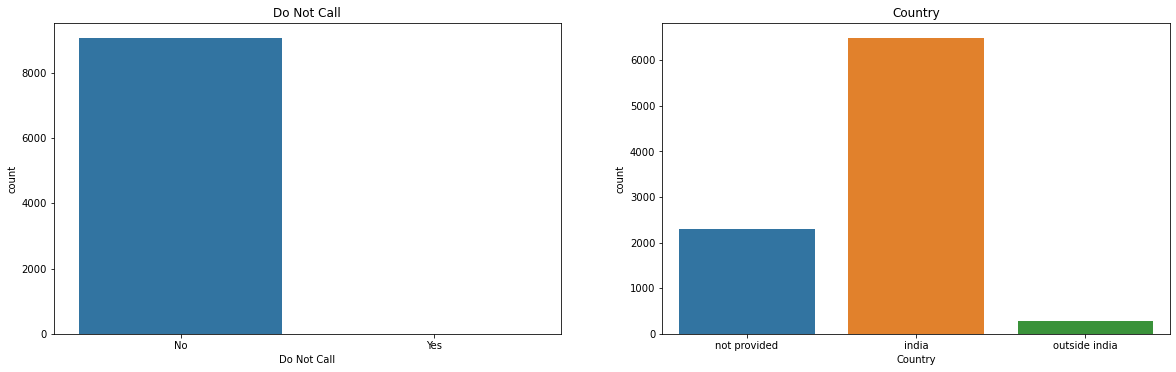

In [23]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,3)
sns.countplot(df3['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df3['Country'])
plt.title('Country')

plt.show()

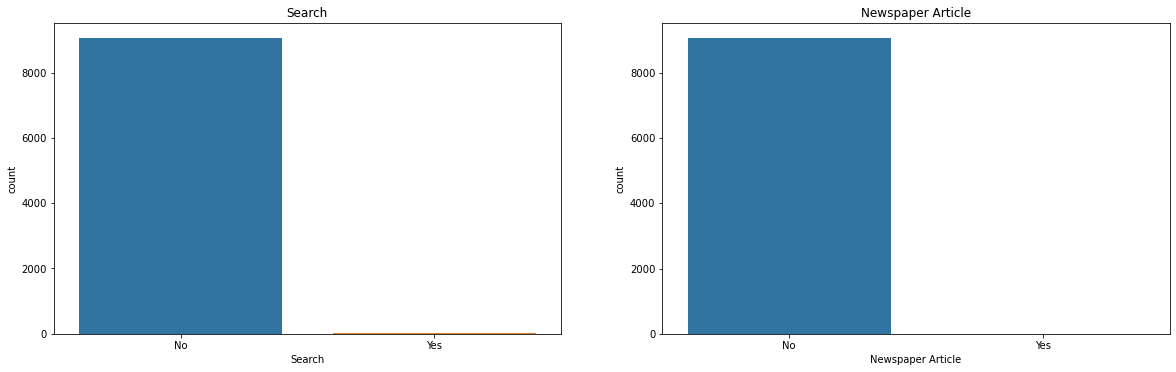

In [24]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,5)
sns.countplot(df3['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df3['Newspaper Article'])
plt.title('Newspaper Article')

plt.show()

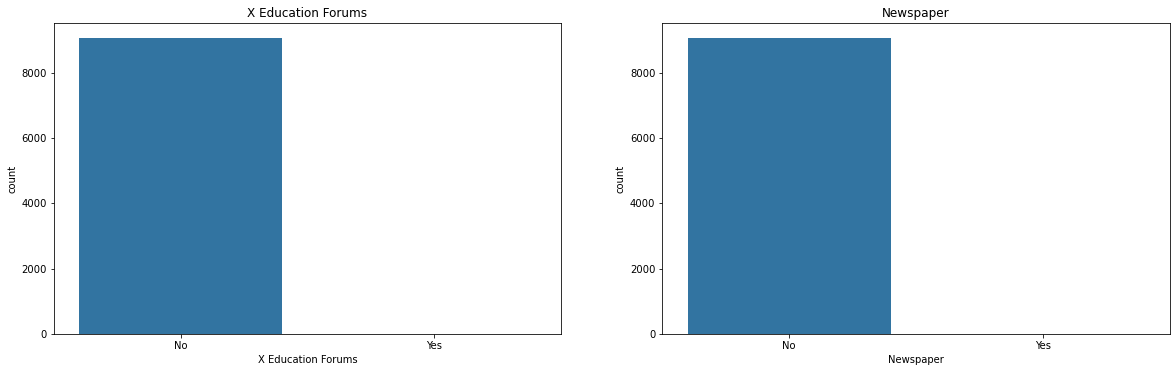

In [25]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,7)
sns.countplot(df3['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df3['Newspaper'])
plt.title('Newspaper')

plt.show()

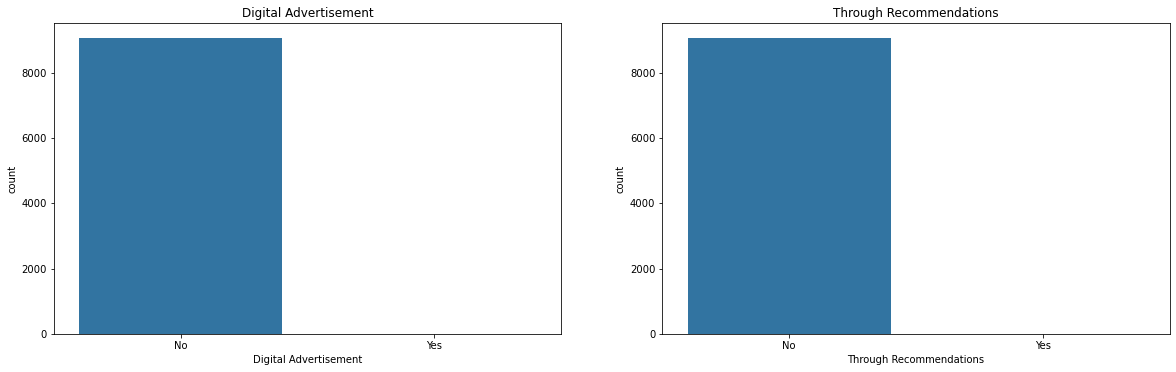

In [26]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,9)
sns.countplot(df3['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df3['Through Recommendations'])
plt.title('Through Recommendations')

plt.show()

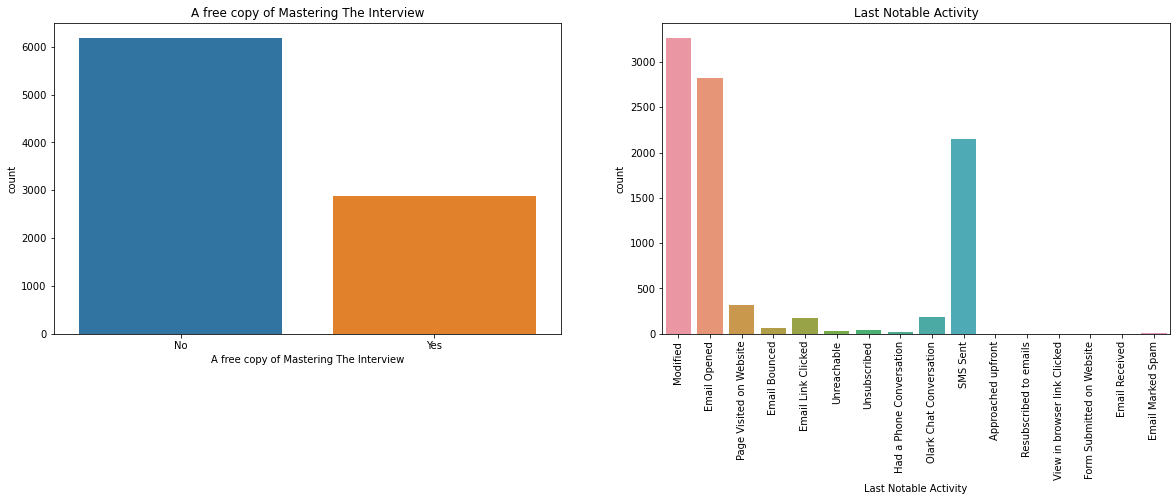

In [27]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,11)
sns.countplot(df3['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df3['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

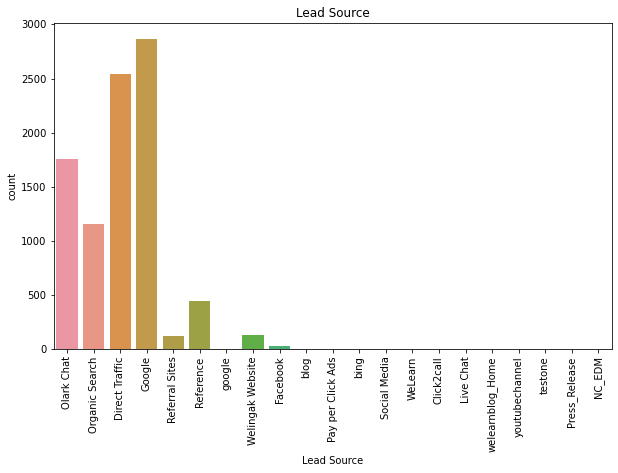

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(df3['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

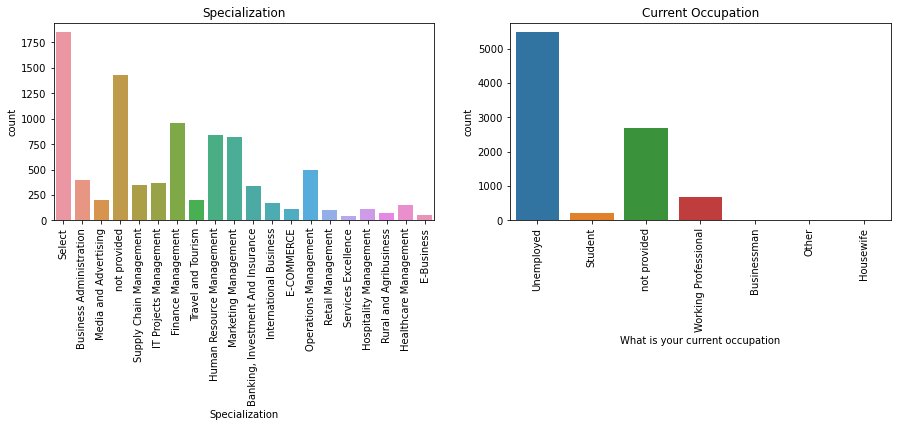

In [29]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.countplot(df3['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df3['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.show()

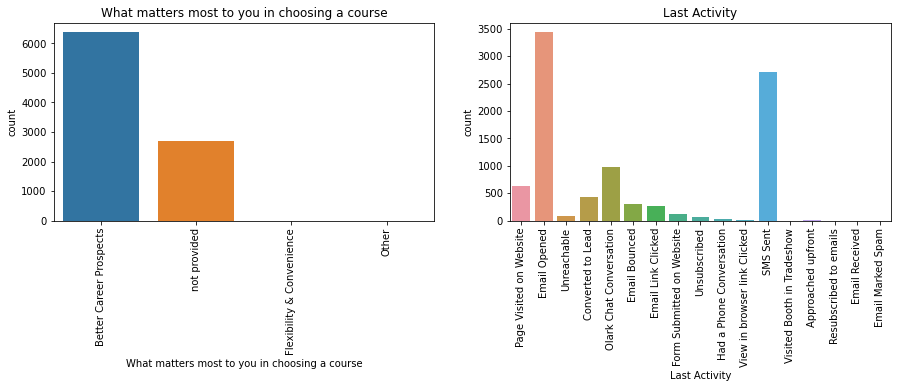

In [30]:
plt.figure(figsize = (15,8))
plt.subplot(2,2,1)
sns.countplot(df3['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,2)
sns.countplot(df3['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

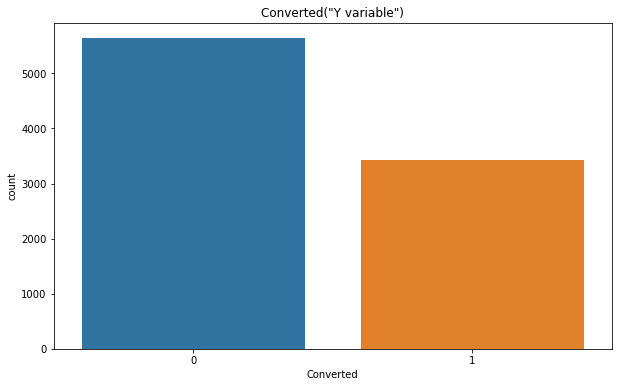

In [31]:
plt.figure(figsize = (10,6))
sns.countplot(df3['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### NUMERICAL VARIABLES

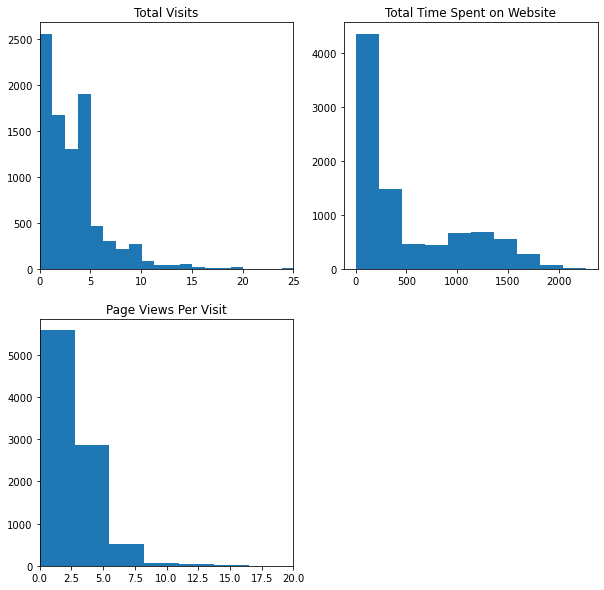

In [32]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(df3['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(df3['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(df3['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

# 

### CHECKING THE CORRELATION BETWEEN VARIABLES

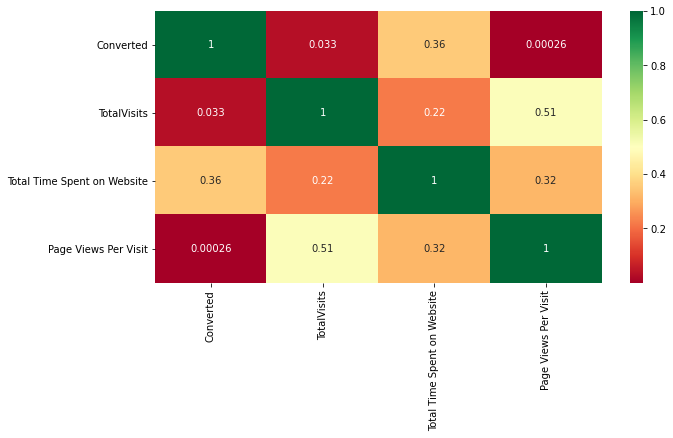

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), cmap='RdYlGn', annot=True)
plt.show()

### CHECKING FOR THE OUTLIERS

In [34]:
outliers = df3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
outliers.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


-- There are no outliers --

# 

### CREATING 'DUMMY' VARIABLES FOR ANALYSIS PURPOSE

In [35]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df3[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df3_dum = pd.concat([df3, dummy], axis=1)
df3_dum.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0


### DROPPING THE ORIGINAL COLUMNS FOR WHICH THE 'DUMMIES' ARE CREATED

In [36]:
df3_dum = df3_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df3_dum.head(2)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 

### TEST-TRAIN SPLIT

In [37]:
X = df3_dum.drop(['Converted'], 1)
X.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Putting the target variable in y
y = df3_dum['Converted']
y.head(2)

0    0
1    0
Name: Converted, dtype: int64

In [39]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [40]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# 

## MODEL BUILDING

In [41]:
# Import 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [42]:
# Import RFE
from sklearn.feature_selection import RFE

In [43]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [44]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Specialization_Business Administration', False, 45),
 ('Specialization_E-Business', False, 41),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 43),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 13),
 ('Specialization_Human Resource Management', False, 44),
 ('Specialization_IT Projects Management', False, 40),
 ('Specialization_International Business', False, 53),
 ('Specialization_Marketing Management', False, 33),
 ('Specialization_Media and Advertising', False, 60),
 ('Specialization_Operations Management', False, 39),
 ('Specialization_Retail Management', False, 22),
 ('Specialization_Rural and Agribusiness', False, 34),
 ('Specialization_Sele

In [45]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [46]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [47]:
# Importing statsmodels
import statsmodels.api as sm
# Generalized Linear model regression results
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Tue, 15 Mar 2022   Deviance:                       5270.1
Time:                        22:00:51   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_Lead Add Form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_Olark Chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_Welingak Website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_Olark Chat Conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_SMS Sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_Housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_Other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_Student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_Unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_Working Professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_Had a Phone Conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [48]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


--The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'--

In [49]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [50]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Tue, 15 Mar 2022   Deviance:                       5285.6
Time:                        22:00:51   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_Lead Add Form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_Olark Chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_Welingak Website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_Olark Chat Conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_SMS Sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_Housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_Other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_Student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_Unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_Working Professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_Unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [51]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


--The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation_Housewife'--

In [52]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [53]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Tue, 15 Mar 2022   Deviance:                       5302.6
Time:                        22:00:52   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_Lead Add Form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_Olark Chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_Welingak Website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_Olark Chat Conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_SMS Sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_Other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_Student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_Unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_Unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [54]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.58
7,Last Activity_SMS Sent,1.53
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
11,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


--All the VIF values are good and all the p-values are below 0.05. So we can fix model.--

# 

## CREATING PREDICTION

In [55]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64

In [56]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [57]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090


In [58]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0


# 

## MODEL EVALUATION

In [59]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [60]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

--ACCURACY IS 81%, WHICH IS A VERY GOOD VALUE--

In [61]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [62]:
# Calculating the sensitivity
TP/(TP+FN)

0.6958469055374593

In [63]:
# Calculating the specificity
TN/(TN+FP)

0.8824133504492939

--With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 88%.--

# 

## OPTIMISING THE ROC CURVE

In [64]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

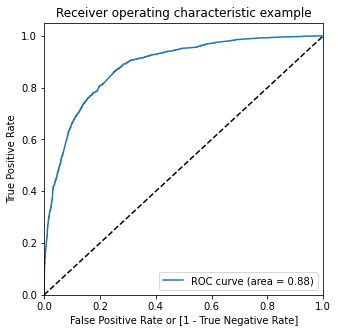

In [65]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

--The area under ROC curve is 0.88 which is a very good value.--

In [66]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [67]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


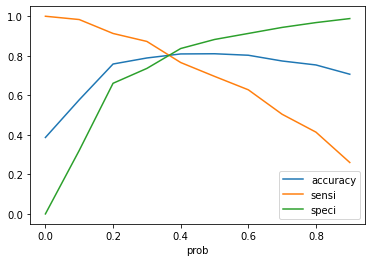

In [68]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

-- FROM THE GRAPH, IT IS VISIBLE THAT THE OPTIMUM CUT-OFF IS 0.35 --

In [69]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [70]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [71]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [72]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [73]:
# Calculating the sensitivity
TP/(TP+FN)

0.8037459283387622

In [74]:
# Calculating the specificity
TN/(TN+FP)

0.8028241335044929

-- WITH THE CURRENT CUT-OFF 0.35, ACCURACY, SENSITIVITY & SPECIFICITY ALL ARE AROUND 80%, WHICH IS OPTIMAL. --

# 

## PREDICTION ON TEST SET

In [75]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

# Substituting all the columns in the final train model
col = X_train.columns

# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,1,0,0,1,0,0


In [76]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [77]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,1
2720,0,0.133180,0
2721,1,0.820744,1


In [78]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [79]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1404,  340],
       [ 183,  796]], dtype=int64)

In [80]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [81]:
# Calculating the sensitivity
TP/(TP+FN)

0.8130745658835546

In [82]:
# Calculating the specificity
TN/(TN+FP)

0.805045871559633

-- With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%. --

# 

## CONCLUSION

#### It was found that the variables that mattered the most in the potential buyers are (In descending order):

#### 1. Total time spent on the Website.
#### 2. Total number of visits.
#### 3. When the lead source was:
        a. Google
        b. Direct traffic
        c. Organic search
        d. Welingak website
#### 4. When the last activity was:
        a. SMS
        b. Olark chat conversation
#### 5. When the lead origin is Lead add format.
#### 6. When their current occupation is as a working professional.